# Data Mining (KEN4113) #
## Lab 3: Classification ##

Konstantin Sandfort
i6255681

In [313]:
# Imports
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [314]:
# Import data

# Training Data
data_train = pd.read_csv('caravan.csv')
y_train = data_train.iloc[:, -1]
data_train = data_train.drop(columns=['CARAVAN POLICY'])

# Test Data
data_test = pd.read_csv('caravanTest.csv')
y_test = data_test.iloc[:, -1]

data_test = data_test.drop(columns=['CARAVAN POLICY'])

pd.set_option('display.max_columns', None)

In [315]:
# --- Step 1: Preprocessing ---

# One-hot-encoding of l0 and l2
def ohe(df, col_name, label):
    cols = pd.get_dummies(df,
                          prefix=label,
                          dtype=int,
                          columns=[col_name],
                          drop_first=False)
    return cols

data_train_ohe = ohe(data_train, 'Customer Subtype', 'l0')
data_train_ohe = ohe(data_train_ohe, 'Customer main type', 'l2')

data_test_ohe = ohe(data_test, 'Customer Subtype', 'l0')
data_test_ohe = ohe(data_test_ohe, 'Customer main type', 'l2')

# Standardize data (scaling and centering)
data_train_ohe = preprocessing.StandardScaler().fit_transform(data_train_ohe)
data_test_ohe = preprocessing.StandardScaler().fit_transform(data_test_ohe)

In [316]:
# Model validation
# Source: https://medium.com/analytics-vidhya/model-validation-for-classification-5ff4a0373090
def display_confusion_matrix(y_actual, y_pred):
    matrix = confusion_matrix(y_pred, y_actual)
    
    matrix = pd.DataFrame(matrix, columns=['Actually No Caravan Insurance', 'Actually Caravan Insurance'], 
                                     index=['Predict No Caravan Insurance', 'Predict Caravan Insurance'])
    sns.heatmap(matrix, annot=True, cmap='magma', fmt='d')

Model 1 accuracy score: 0.94025


/home/konstantin/PycharmProjects/data_mining_course/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


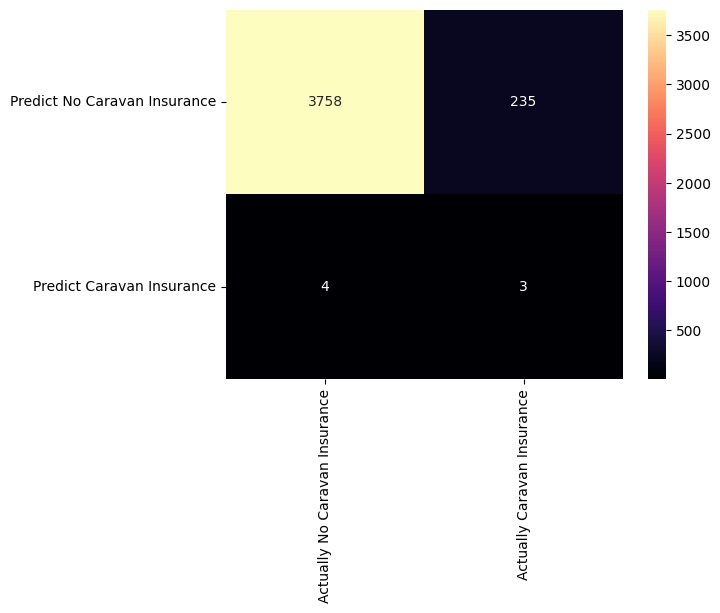

In [317]:
# Model 1: Logistical Regression with all features

log_reg_v1_model = LogisticRegression(verbose=False, penalty=None)
log_reg_v1_model.fit(X=data_train_ohe, y=y_train)
prediction_1 = log_reg_v1_model.predict(data_test_ohe)
score_1 = log_reg_v1_model.score(X=data_test_ohe, y=y_test)
print(f'Model 1 accuracy score: {score_1}')

display_confusion_matrix(y_test, prediction_1)

/home/konstantin/PycharmProjects/data_mining_course/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


['Other religion', 'Married', 'Household without children', 'High level education', 'Medium level education', 'Skilled labourers', 'Social class B2', 'Social class C', 'Social class D', 'Rented house', '1 car', 'National Health Service', 'Income 75-122.000', 'Income >123.000', 'Average income', 'Contribution third party insurance (firms)', 'Contribution family accidents insurance policies', 'Contribution fire policies', 'Contribution bicycle policies', 'Contribution property insurance policies', 'Number of third party insurance (firms)', 'Number of re policies', 'Number of bicycle policies']
Model 2 accuracy score: 0.527


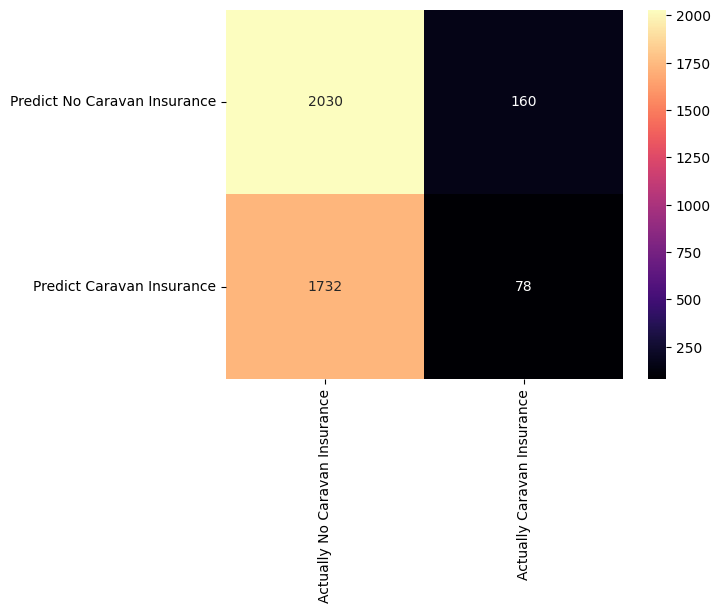

In [318]:
# --- Step 2: Feature Selection
# Univariate Feature Selection

def univariate_feature_selection(df, y, k_f):
    selector = SelectKBest(f_classif, k=k_f)
    selected = selector.fit_transform(df, y)
    selector.get_support()
    selected_features_mask = selector.get_support()
    f_names = data_train.columns
    col_names = [feature for feature, selected in zip(f_names, selected_features_mask) if selected]
    return selected, col_names

ufs_train, col_names_train = univariate_feature_selection(data_train_ohe, y_train, 25)
ufs_test, col_names_test = univariate_feature_selection(data_test_ohe, y_test, 25)

log_reg_v2_model = LogisticRegression(verbose=False, penalty=None)
log_reg_v2_model.fit(X=ufs_train, y=y_train)
prediction_2 = log_reg_v2_model.predict(ufs_test)

print(col_names_train)


score_2 = log_reg_v2_model.score(X=ufs_test, y=y_test)
print(f'Model 2 accuracy score: {score_2}')

display_confusion_matrix(y_test, prediction_2)

Score 3: 0.89175
0.89175


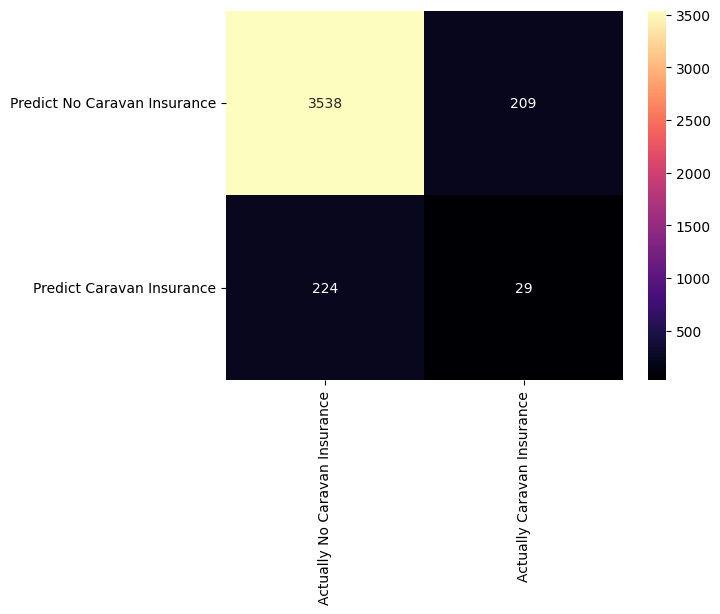

In [319]:
# Decision Tree Classification
# We use the original OHE data because the tree itself does feature selection
tree_model = tree.DecisionTreeClassifier(max_depth=30)
tree_model = tree_model.fit(data_train_ohe, y_train)
prediction_3 = tree_model.predict(data_test_ohe)
score_3 = tree_model.score(data_test_ohe, y_test)
print(f'Score 3: {score_3}')
display_confusion_matrix(y_test, prediction_3)
print(tree_model.score(data_test_ohe, y_test))

Score 4: 0.935


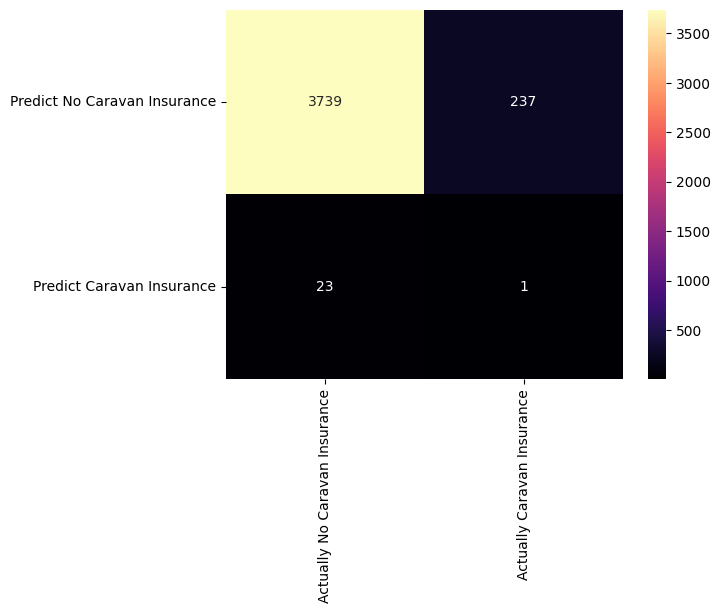

In [320]:
# KNN model
knn_model = KNeighborsClassifier(n_neighbors=2)
knn_model.fit(ufs_train, y_train)
prediction_4 = knn_model.predict(ufs_test)
score_4 = knn_model.score(ufs_test, y_test)
print(f'Score 4: {score_4}')
display_confusion_matrix(y_test, prediction_4)